<a href="https://colab.research.google.com/github/RAJAS-KAR/Item-Demand-Forecasting/blob/main/ITEM_DEMAND_FORCASTING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import data and read the file

In [2]:
df = pd.read_csv('/content/train 2.csv')
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [3]:
df.isnull().sum()

date     0
store    0
item     0
sales    0
dtype: int64

In [4]:
df.describe()

,store,item,sales
count,913000.000000,913000.000000,913000.000000
mean,5.500000,25.500000,52.250287
std,2.872283,14.430878,28.801144
min,1.000000,1.000000,0.000000
25%,3.000000,13.000000,30.000000
50%,5.500000,25.500000,47.000000
75%,8.000000,38.000000,70.000000
max,10.000000,50.000000,231.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   date    913000 non-null  object
 1   store   913000 non-null  int64 
 2   item    913000 non-null  int64 
 3   sales   913000 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 27.9+ MB


convert to datatime 

In [6]:
df['date'] = pd.to_datetime(df['date'])

In [7]:
df.dtypes

date     datetime64[ns]
store             int64
item              int64
sales             int64
dtype: object

In [8]:
df = df.drop_duplicates()

In [9]:
df = df.groupby(['item', 'date']).agg({'sales':'sum'}).reset_index()

In [10]:
df = df.set_index('date', drop = True)
df

,item,sales
date,,
2013-01-01,1,133
2013-01-02,1,99
2013-01-03,1,127
2013-01-04,1,145
2013-01-05,1,149
...,...,...
2017-12-27,50,511
2017-12-28,50,587
2017-12-29,50,596


90 days sum

In [11]:
df_agg = df.groupby(['item']).rolling(90).sum().shift(-90).dropna().reset_index()
df_agg

,item,date,sales
0,1,2013-01-01,12848.0
1,1,2013-01-02,12936.0
2,1,2013-01-03,13019.0
3,1,2013-01-04,13103.0
4,1,2013-01-05,13153.0
...,...,...,...
86844,50,2017-09-28,62200.0
86845,50,2017-09-29,61962.0
86846,50,2017-09-30,61687.0
86847,50,2017-10-01,61392.0


#EDA

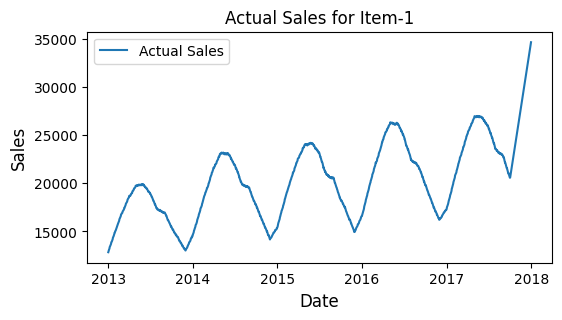

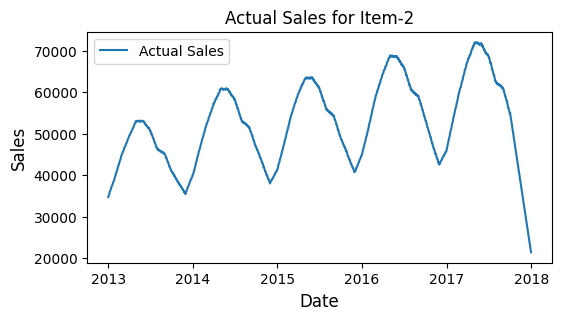

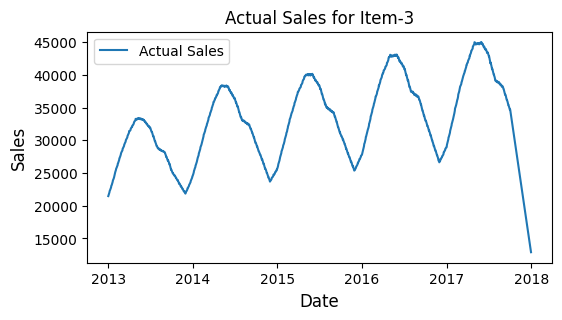

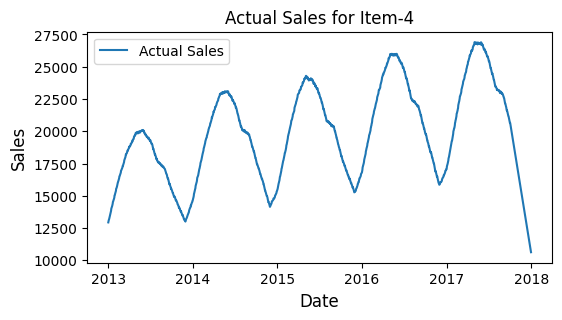

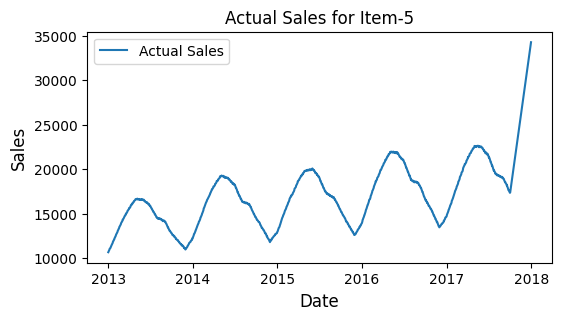

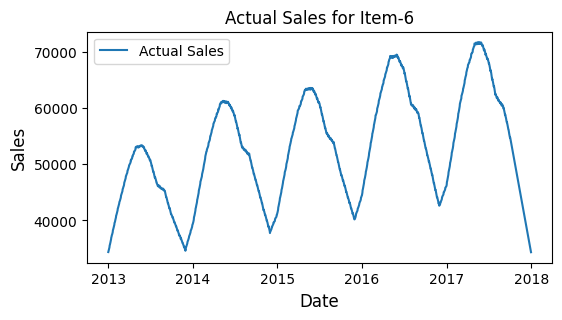

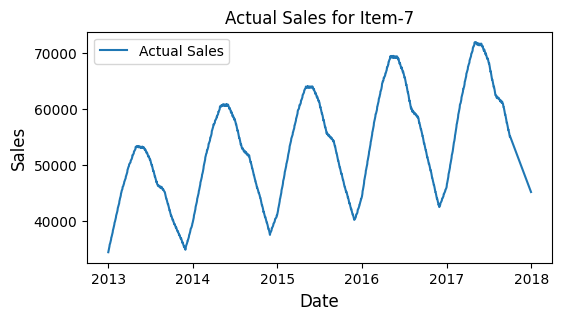

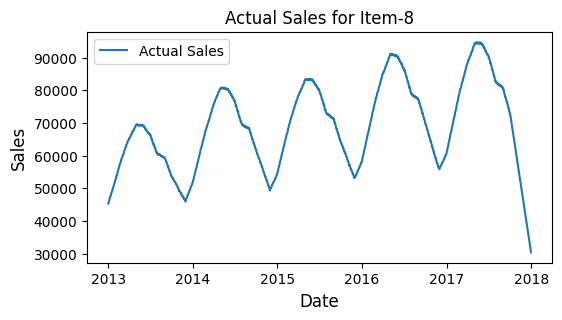

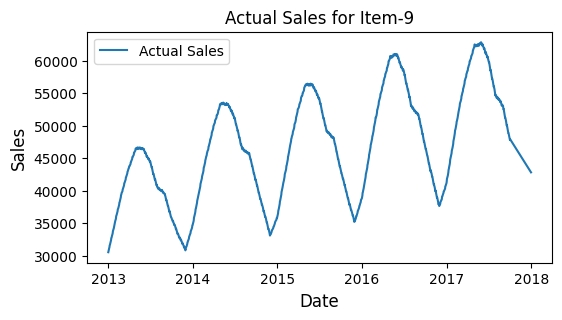

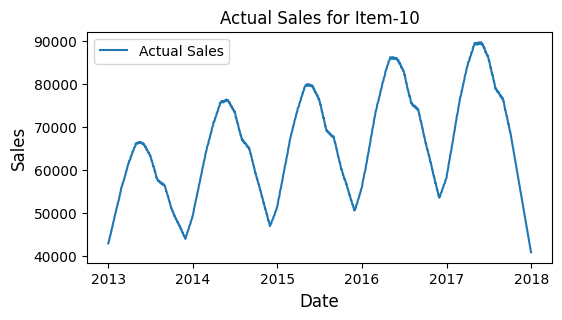

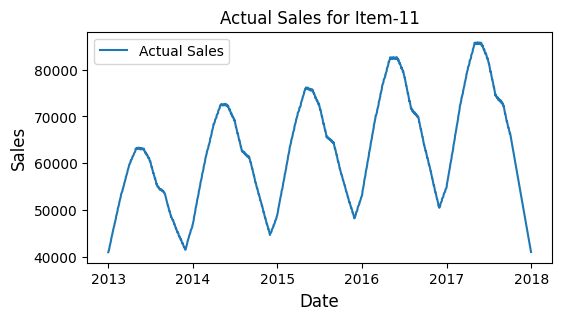

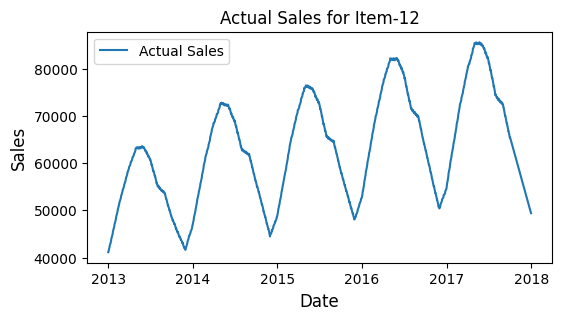

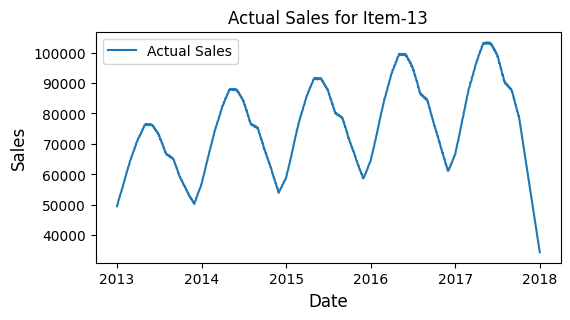

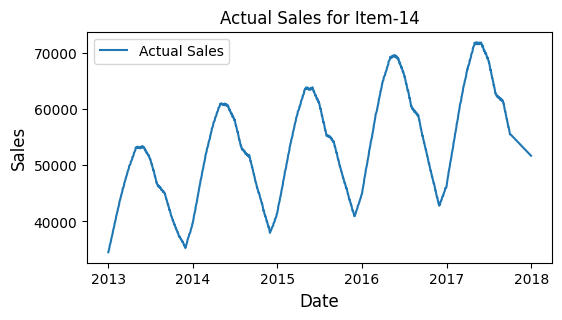

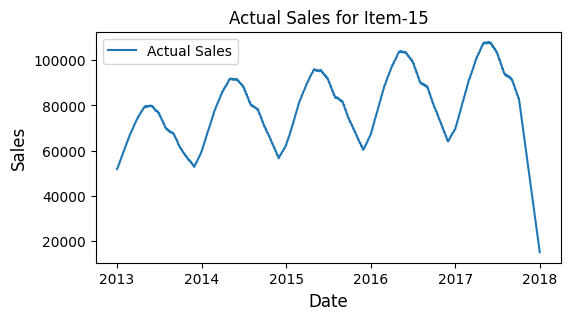

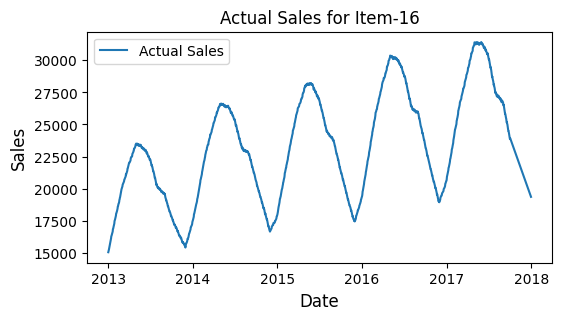

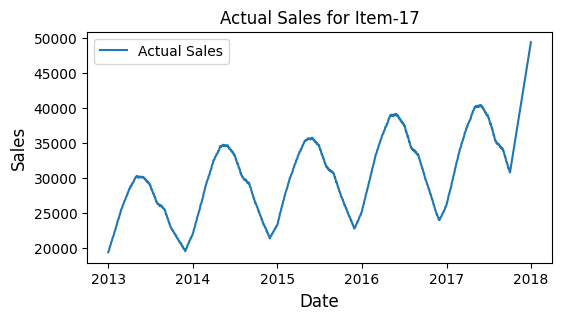

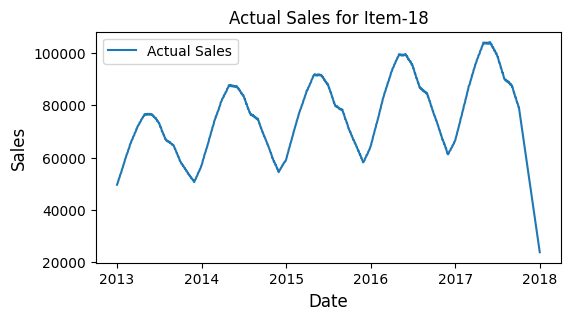

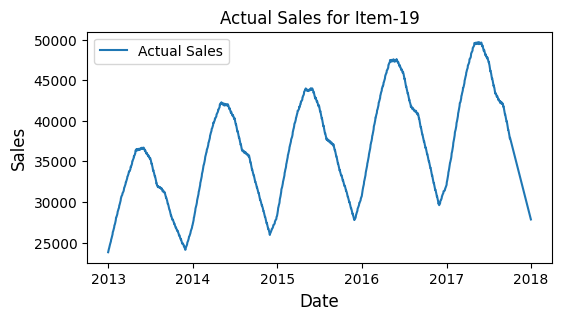

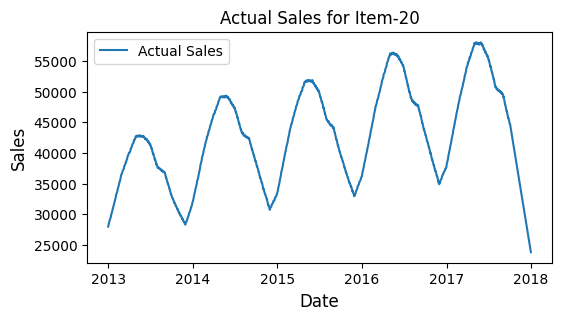

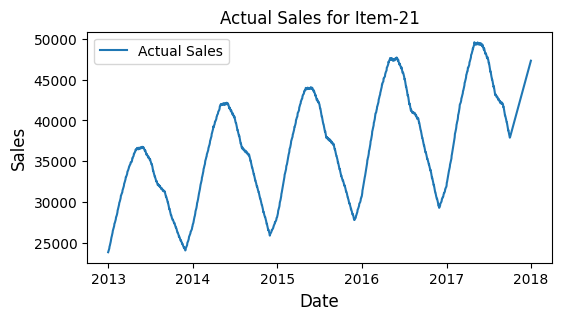

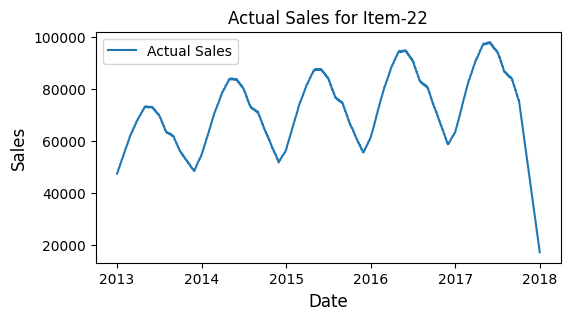

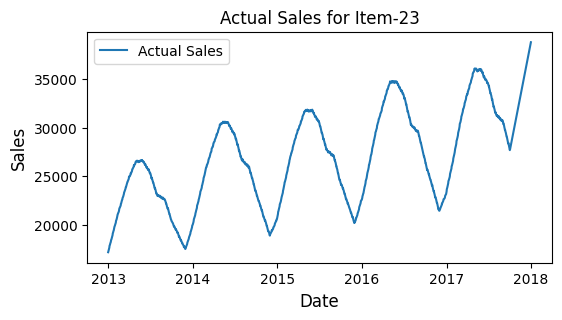

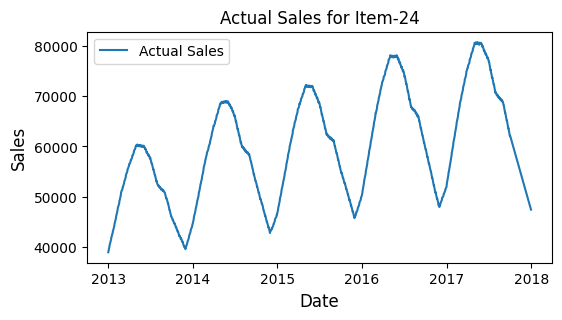

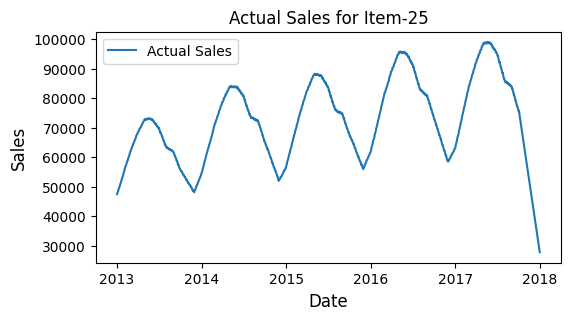

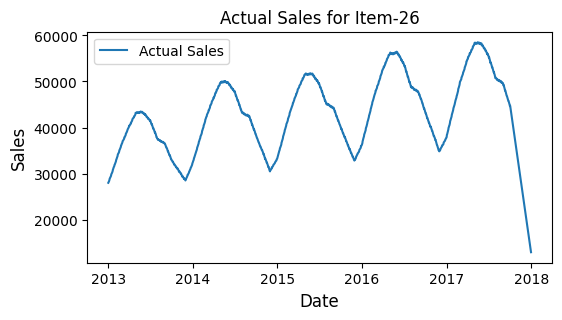

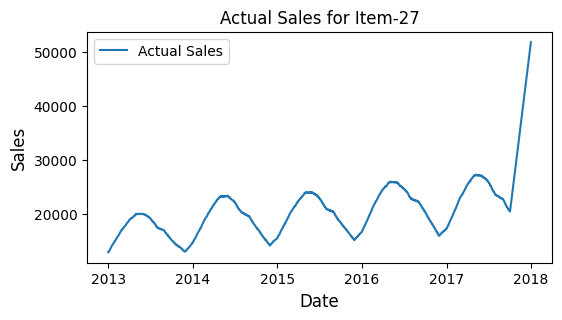

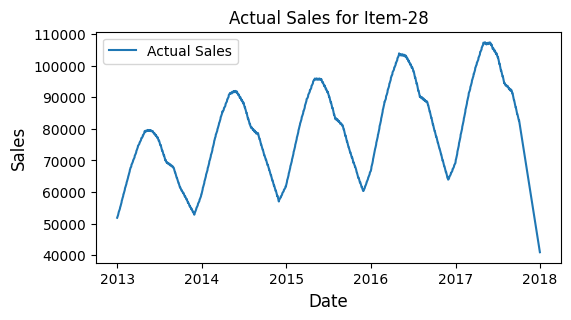

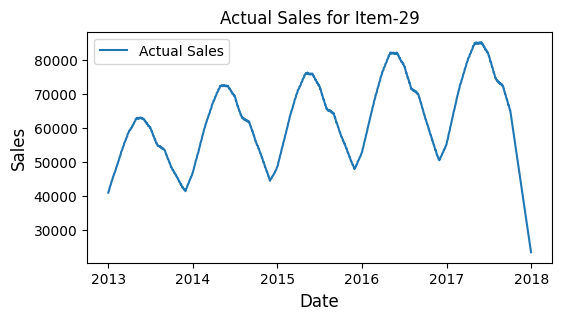

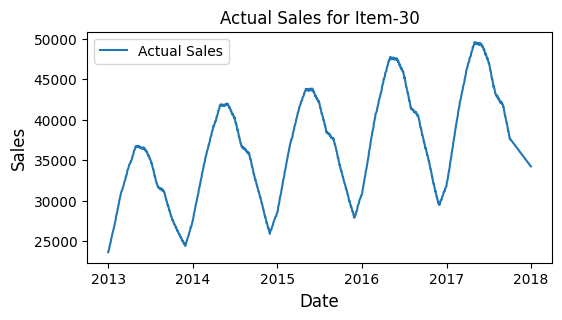

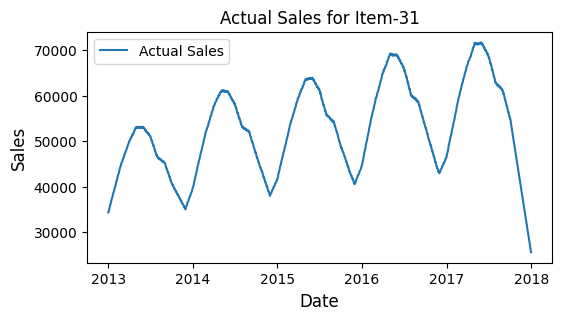

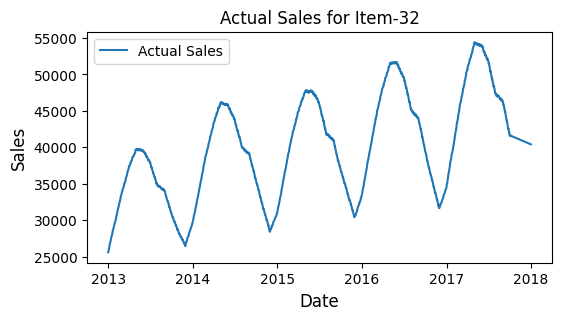

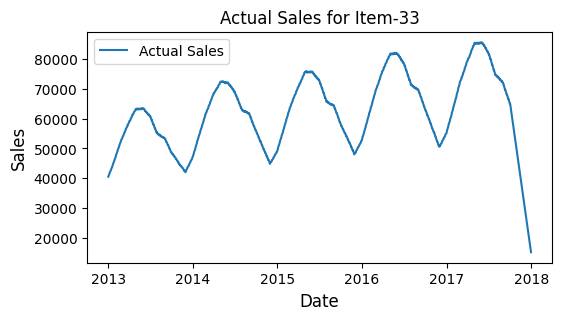

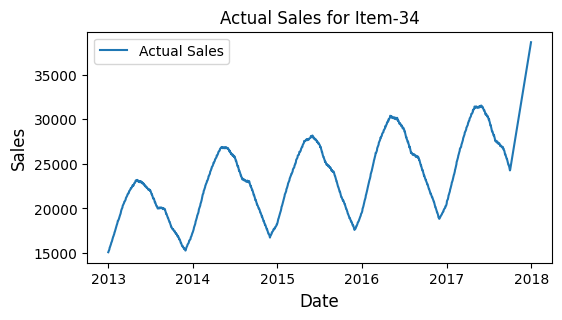

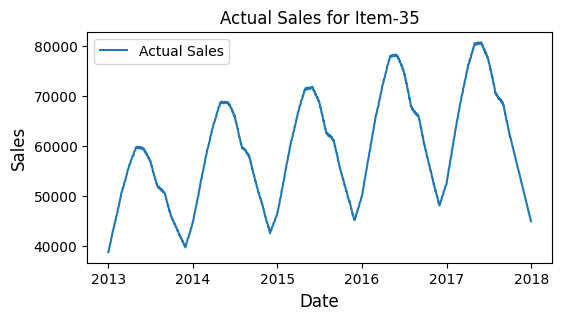

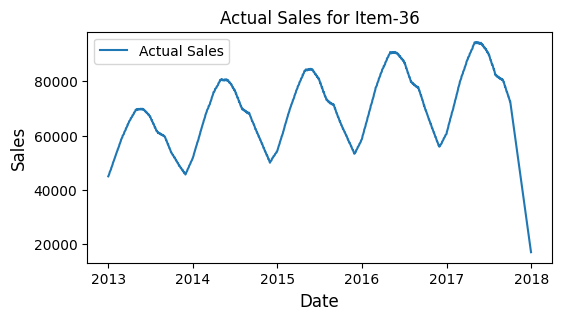

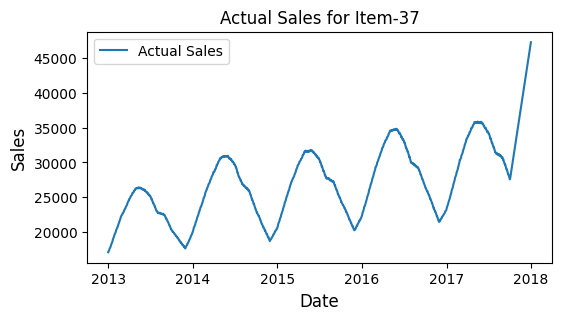

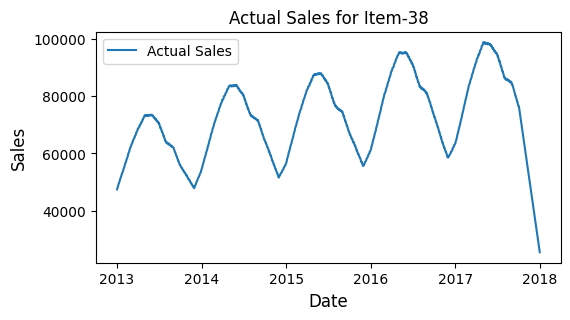

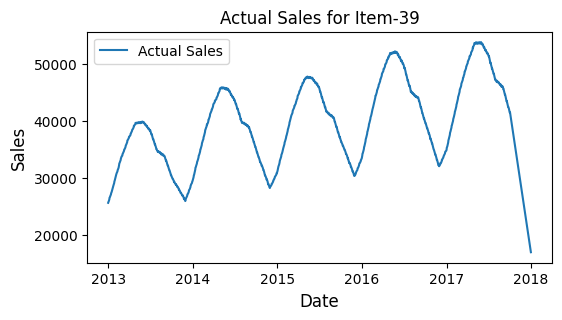

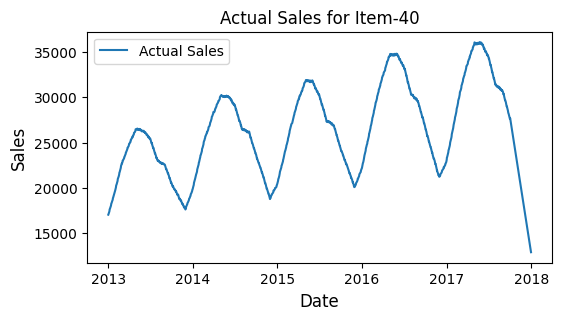

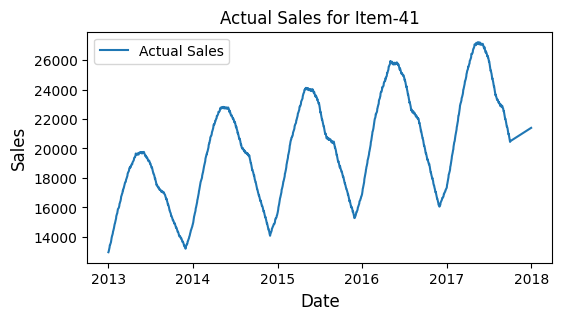

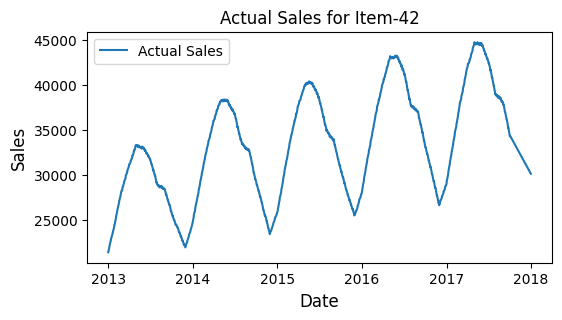

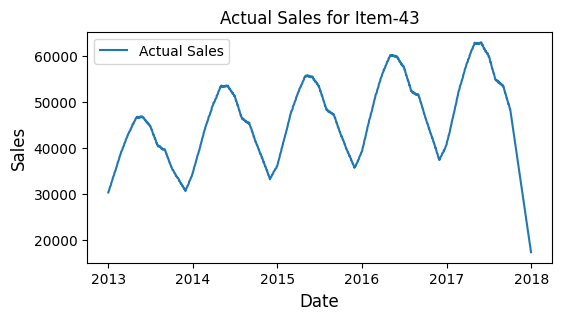

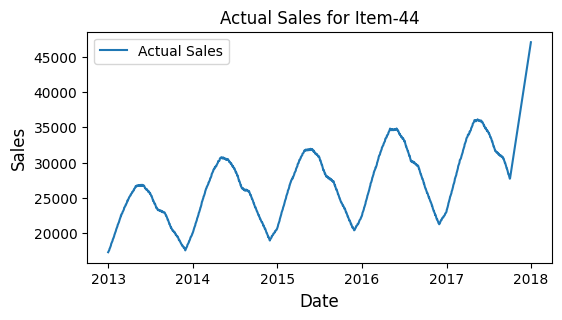

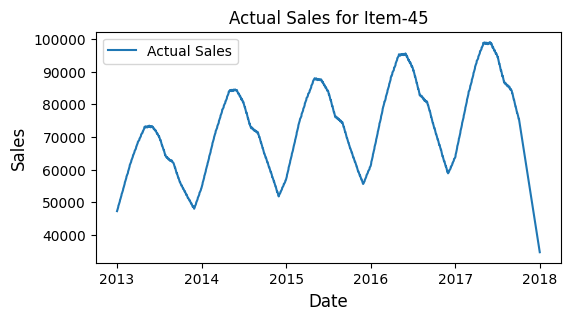

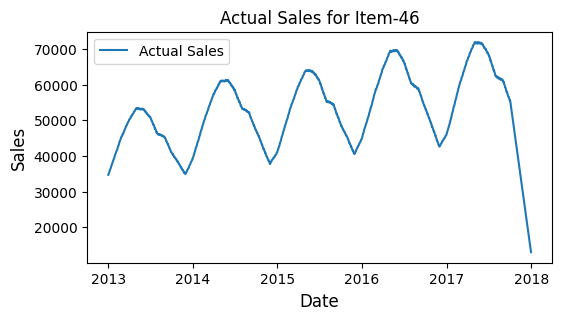

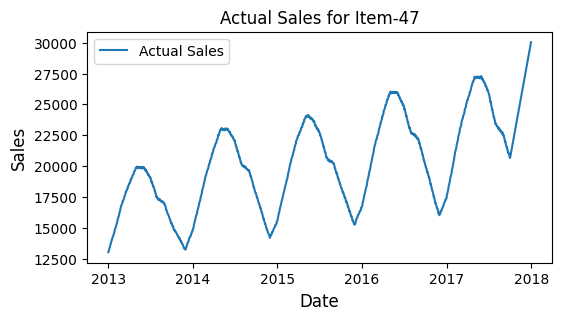

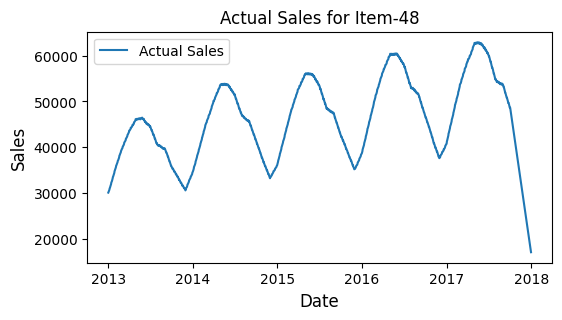

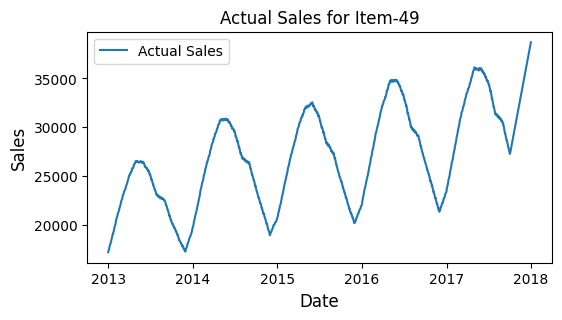

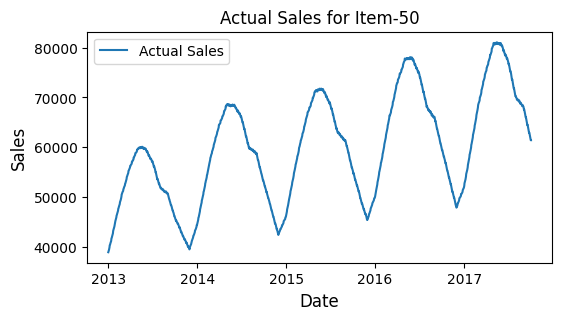

In [12]:
 for i in range(1, 51):
  plot_df = df_agg.loc[df_agg['item']==i]
  plt.figure(figsize=(6,3))
  plt.plot(plot_df['date'], plot_df['sales'], label='Actual Sales')
  plt.title('Actual Sales for Item-{}'.format(i), size=12)
  plt.xlabel('Date', size=12)
  plt.ylabel('Sales', size=12)
  plt.legend(loc='best')
  plt.show()


#Feature Engineering

In [13]:
df_agg['day_of_month']=df_agg['date'].dt.day
df_agg['month']=df_agg['date'].dt.month
df_agg['year']=df_agg['date'].dt.year
df_agg['week_of_year']=df_agg['date'].dt.weekofyear
df_agg['quarter']=df_agg['date'].dt.quarter
df_agg['is_month_start']=df_agg['date'].dt.is_month_start.astype(int)
df_agg['is_month_end']=df_agg['date'].dt.is_month_end.astype(int)
df_agg['is_quarter_start']=df_agg['date'].dt.is_quarter_start.astype(int)
df_agg['is_quarter_end']=df_agg['date'].dt.is_quarter_end.astype(int)

In [15]:
df_agg = df_agg.set_index('date', drop = True)

In [16]:
df_agg

,item,sales,day_of_month,month,year,week_of_year,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end
date,,,,,,,,,,,
2013-01-01,1,12848.0,1,1,2013,1,1,1,0,1,0
2013-01-02,1,12936.0,2,1,2013,1,1,0,0,0,0
2013-01-03,1,13019.0,3,1,2013,1,1,0,0,0,0
2013-01-04,1,13103.0,4,1,2013,1,1,0,0,0,0
2013-01-05,1,13153.0,5,1,2013,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2017-09-28,50,62200.0,28,9,2017,39,3,0,0,0,0
2017-09-29,50,61962.0,29,9,2017,39,3,0,0,0,0
2017-09-30,50,61687.0,30,9,2017,39,3,0,1,0,1


In [45]:
corrmat = df_agg.corr()
corrmat

,item,sales,day_of_month,month,year,week_of_year,quarter,is_month_start,is_month_end,is_quarter_start,is_quarter_end
item,1.000000,-0.068372,-0.000034,-0.000033,-0.000030,-0.000035,-0.000028,0.000004,-0.000105,0.000002,-0.000181
sales,-0.068372,1.000000,0.002807,-0.127123,0.247802,-0.127374,-0.134140,-0.001008,-0.001088,-0.002330,-0.002129
day_of_month,-0.000034,0.002807,1.000000,0.010283,-0.001722,0.065582,0.011252,-0.310439,0.310432,-0.180268,0.181045
month,-0.000033,-0.127123,0.010283,1.000000,-0.104889,0.966427,0.970067,0.001875,0.003667,-0.025385,0.038430
year,-0.000030,0.247802,-0.001722,-0.104889,1.000000,-0.097934,-0.107709,0.004460,0.004363,0.008009,0.007848
week_of_year,-0.000035,-0.127374,0.065582,0.966427,-0.097934,1.000000,0.941543,-0.001538,0.007692,-0.001991,0.015753
quarter,-0.000028,-0.134140,0.011252,0.970067,-0.107709,0.941543,1.000000,0.002714,0.002622,0.006689,0.006537
is_month_start,0.000004,-0.001008,-0.310439,0.001875,0.004460,-0.001538,0.002714,1.000000,-0.034539,0.580686,-0.020050
is_month_end,-0.000105,-0.001088,0.310432,0.003667,0.004363,0.007692,0.002622,-0.034539,1.000000,-0.020056,0.580495
is_quarter_start,0.000002,-0.002330,-0.180268,-0.025385,0.008009,-0.001991,0.006689,0.580686,-0.020056,1.000000,-0.011642


<Axes: >

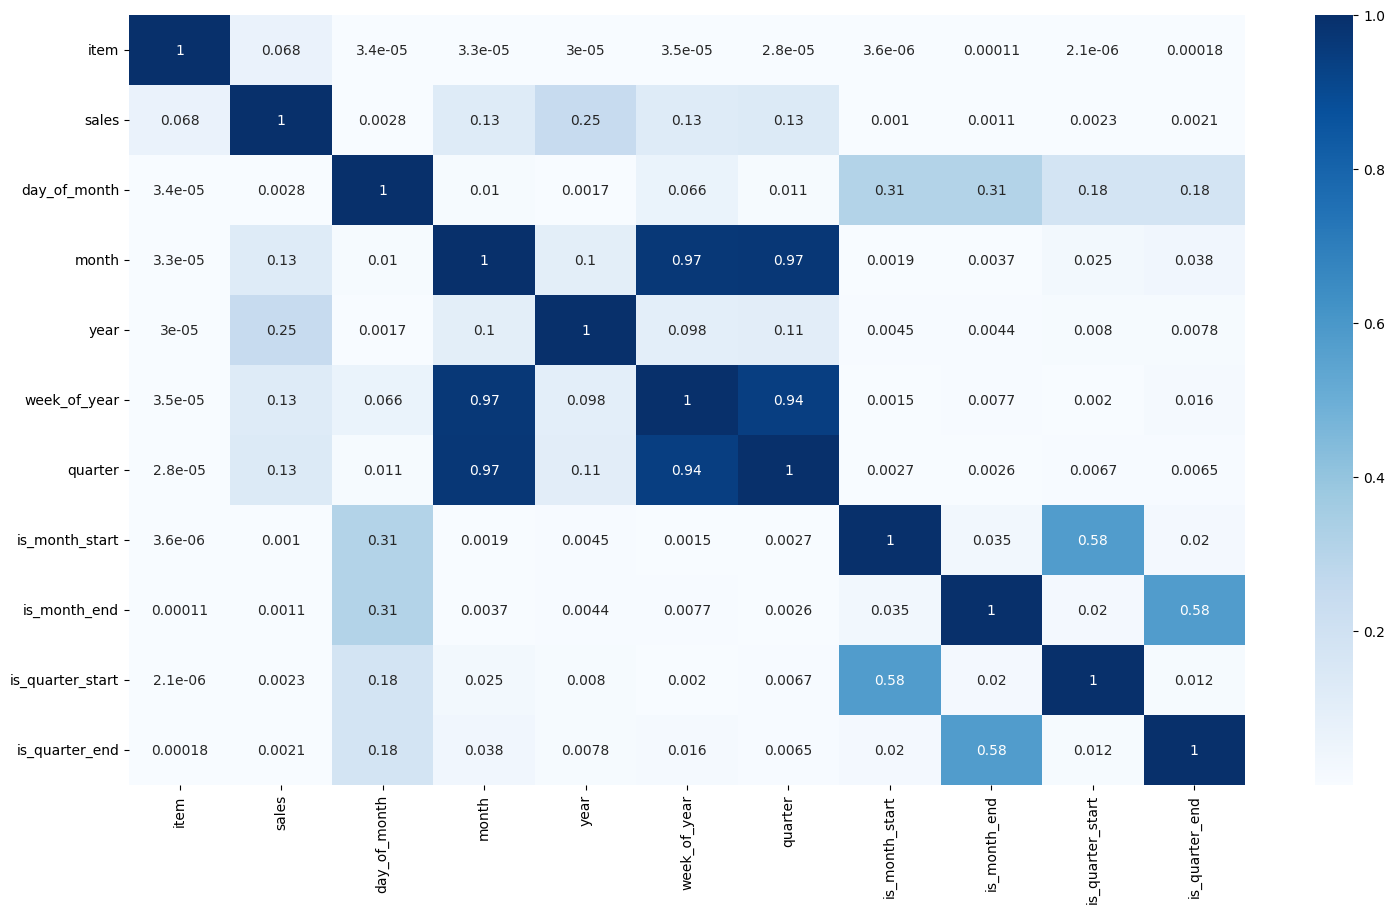

In [47]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat.abs(), annot = True, cmap = 'Blues')

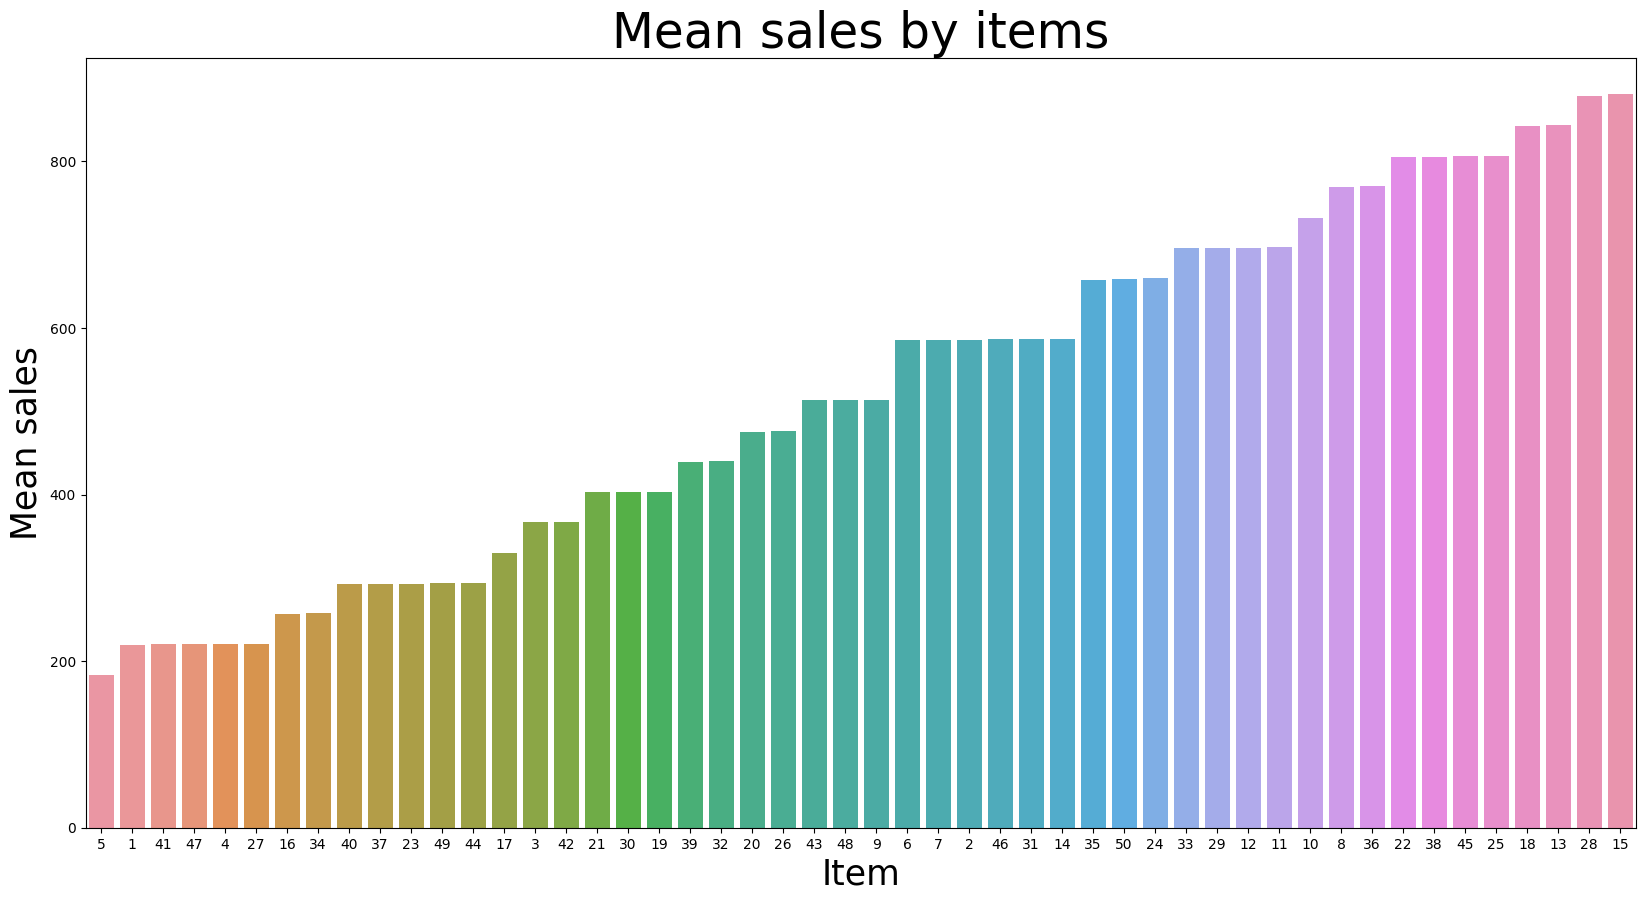

In [49]:
plt.close('all')
item_df = df.groupby(['item']).mean()
item_df.sort_values('sales',ascending=True,inplace=True)
x = item_df.index
y = item_df.sales
plt.figure(figsize=(20,10))
sns.barplot(x=x, y=y, order=x)
plt.xlabel("Item",fontsize = 25)
plt.ylabel("Mean sales",fontsize=25)
plt.title("Mean sales by items",fontsize=35)
plt.show()

In [17]:
df_agg['sales'] = df_agg['sales'].astype('int')

In [18]:
df_agg.dtypes

item                int64
sales               int64
day_of_month        int64
month               int64
year                int64
week_of_year        int64
quarter             int64
is_month_start      int64
is_month_end        int64
is_quarter_start    int64
is_quarter_end      int64
dtype: object

#Model  Fitting

#LinearRegression

In [27]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
# running a for loop with a list of unique items in the dataset as the iterable
for i in list(df_agg['item'].unique()):

  #filtering the data item_wise
  data = df_agg[df_agg['item']==i].drop(['item'], axis=1)
  
  #Splitting the dataset into dependent and independent variable
  x = data.drop(['sales'], axis=1)
  y = data['sales']

  #since it is a time series dataset we should split the train and test data 
  #Taking 2013 to 2016 data as train data
  #Taking 2017 data as test data
  x_train = x.loc[:'2016-12-31']
  x_test = x.loc['2017-01-01':'2017-10-02'] 
  y_train = y.loc[:'2016-12-31']
  y_test = y.loc['2017-01-01':'2017-10-02']

  

  # Initialize the model
  regressor = LinearRegression()

  # Fitting the data to the model
  regressor.fit(x_train, y_train)

In [28]:
y_pred = regressor.predict(x_test)

In [64]:
from sklearn import metrics
from sklearn.metrics import r2_score
R2_score_REG = metrics.r2_score(y_test, y_pred)
print(R2_score_REG)

-0.2512053597302084


#DecisionTreeRegressor

In [31]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth = 10)
 #running a for loop with a list of unique items in the dataset as the iterable
for i in list(df_agg['item'].unique()):

  #filtering the data item_wise
  data = df_agg[df_agg['item']==i].drop(['item'], axis=1)
  
  #Splitting the dataset into dependent and independent variable
  x = data.drop(['sales'], axis=1)
  y = data['sales']

  #since it is a time series dataset we should split the train and test data 
  #Taking 2013 to 2016 data as train data
  #Taking 2017 data as test data
  x_train = x.loc[:'2016-12-31']
  x_test = x.loc['2017-01-01':'2017-10-02'] 
  y_train = y.loc[:'2016-12-31']
  y_test = y.loc['2017-01-01':'2017-10-02']

  

  # Initialize the model
  dt = DecisionTreeRegressor(max_depth = 10)

  # Fitting the data to the model
  dt.fit(x_train, y_train)

In [32]:
y_pred_dt  =  dt.predict(x_test)

In [68]:
from sklearn import metrics
from sklearn.metrics import r2_score
R2_score_DT=metrics.r2_score(y_test, y_pred_dt)
print(R2_score_DT)

0.8962949214322966


#RandomForestRegressor

In [34]:
from sklearn.ensemble import RandomForestRegressor

# running a for loop for all 50 items
for i in list(df_agg['item'].unique()):
 
  # filtering the data item-wise
  split_data_rf = df_agg[df_agg['item']==i].drop(['item'], axis=1)
  
  # Splitting the dataset into dependent and independent variable
  x_rf = split_data_rf.drop(['sales'], axis=1)
  y_rf = split_data_rf['sales']

  #since it is a time series dataset we should split the train and test data 
  #Taking 2013 to 2016 data as train data
  #Taking 2017 data as test data
  
  x_train_rf = x_rf.loc[:'2016-12-31']
  x_test_rf = x_rf.loc['2017-01-01':'2017-10-02'] 
  y_train_rf = y_rf.loc[:'2016-12-31']
  y_test_rf = y_rf.loc['2017-01-01':'2017-10-02']


  # Initializing the model
  rf_reg= RandomForestRegressor(n_estimators = 300, max_features = 'sqrt', max_depth = 15, random_state = 18)
  
  # Fitting the  the model
  rf_reg.fit(x_train, y_train)

In [36]:
y_pred_rf = rf_reg.predict(x_test)

In [69]:
from sklearn import metrics
from sklearn.metrics import r2_score
R2_score_RF=metrics.r2_score(y_test, y_pred_rf)
print(R2_score_RF)

0.8753338629169479


#KNN_Regressor

In [38]:
from sklearn.neighbors import KNeighborsRegressor
# running a for loop for all 50 items
for i in list(df_agg['item'].unique()):
 
  # filtering the data item-wise
  split_data_knn = df_agg[df_agg['item']==i].drop(['item'], axis=1)
  
  
  # Splitting the dataset into dependent and independent variable
  x_knn = split_data_knn.drop(['sales'], axis=1)
  y_knn = split_data_knn['sales']
  

  #since it is a time series dataset we should split the train and test data 
  #Taking 2013 to 2016 data as train data
  #Taking 2017 data as test data 
  x_train_knn = x_knn.loc[:'2016-12-31']
  x_test_knn = x_knn.loc['2017-01-01':'2017-10-02'] 
  y_train_knn = y_knn.loc[:'2016-12-31']
  y_test_knn = y_knn.loc['2017-01-01':'2017-10-02']

  # Initializing the model
  knn_REG = KNeighborsRegressor(n_neighbors=7)
  
  # Fitting the data to the model
  knn_REG.fit(x_train, y_train)

In [39]:
y_pred_knn = knn_REG.predict(x_test)

In [72]:
from sklearn import metrics
from sklearn.metrics import r2_score
R2_score_KNN = metrics.r2_score(y_test, y_pred_knn)
print(R2_score_KNN)

0.6589450194986196


#XGBoost_Regressor

In [42]:
from xgboost import XGBRegressor as XGB
# running a for loop for every 50 items
for i in list(df_agg['item'].unique()):

  # filtering the data item-wise
  data = df_agg[df_agg['item']==i].drop(['item'], axis=1)
  
  # Splitting the dataset into dependent and independent variable
  x = data.drop(['sales'], axis=1)
  y = data['sales']
   
  #since it is a time series dataset we should split the train and test data 
  #Taking 2013 to 2016 data as train data
  #Taking 2017 data as test data
  x_train = x.loc[:'2016-12-31']
  x_test = x.loc['2017-01-01':'2017-10-02'] 
  y_train = y.loc[:'2016-12-31']
  y_test = y.loc['2017-01-01':'2017-10-02']

  # Initialize the model
  xgbr = XGB(verbosity=0,learning_rate = 0.5, n_estimators=100)

  # Fitting the the model
  xgbr.fit(x_train, y_train)


In [43]:
y_pred_xgb = xgbr.predict(x_test)

In [73]:
from sklearn import metrics
from sklearn.metrics import r2_score
R2_score_XGB=metrics.r2_score(y_test, y_pred_xgb)
print(R2_score_XGB)

0.8989651169402424


In [74]:
model = pd.DataFrame({'model':['Linear_regression', 'KNN','Decision Tree', 'Random Forest', 'XGboost'],
                  'R2_SCORE':[R2_score_REG, R2_score_KNN, R2_score_DT, R2_score_RF, R2_score_XGB]})

In [75]:
model

,model,R2_SCORE
0,Linear_regression,-0.251205
1,KNN,0.658945
2,Decision Tree,0.896295
3,Random Forest,0.875334
4,XGboost,0.898965


#XGboost model performing better than other models